In [1]:
# Importing some basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time    # For meassuring total time taken by code
%matplotlib inline     
# Instead of using plot.show() for showing every diagram, we can use it

In [2]:
# Importing Dataset
df = pd.read_csv('songs.csv')

In [3]:
#
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


In [4]:
# Top 5 records of dataset
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


In [5]:
# Describe the dataset
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/kya-khoob-lagti-ho,Telugu
freq,26,1410,1410,447,2,4996


In [6]:
# More information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41355 entries, 0 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       41355 non-null  object
 1   singer     41355 non-null  object
 2   singer_id  41355 non-null  object
 3   duration   41355 non-null  object
 4   link       41355 non-null  object
 5   language   41355 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [7]:
# Total number of rows and columns in dataset
df.shape

(41355, 6)

In [8]:
# Columns in dataset
df.columns

Index(['name', 'singer', 'singer_id', 'duration', 'link', 'language'], dtype='object')

In [9]:
# Values in the dataset
df.values

array([['Dil - E - Nadan Tujhe', 'Chitra Singh|Jagjit Singh',
        '/artist/chitra-singh|/artist/jagjeet-singh-1', '05:00',
        '/dil-e-nadan-tujhe-3', 'Urdu'],
       ['Agar Hum Kahen Aur Woh Muskara De', 'Chitra Singh|Jagjit Singh',
        '/artist/chitra-singh|/artist/jagjeet-singh-1', '06:26',
        '/agar-hum-kahen-aur-woh-muskura-den', 'Urdu'],
       ['Unke Dekhe Se', 'Jagjit Singh', '/artist/jagjeet-singh-1',
        '03:41', '/unke-dekhe-se', 'Urdu'],
       ...,
       ['Ei Je Bangla', 'Sandhya Mukherjee|Hemant Kumar',
        '/artist/sandhya-mukherjee|/artist/hemanta-mukherjee', '07:36',
        '/ei-je-bangla', 'Bengali'],
       ['Jatone Hridaye Rekho', 'Ajoy Chakrabarty',
        '/artist/ajoy-chakrabarty', '04:29', '/jatone-hridaye-rekho',
        'Bengali'],
       ['Tomar Je Oi Haater Mala', 'Asha Bhosle',
        '/artist/asha-bhosle-1', '03:22', '/tomar-je-oi-haater-mala',
        'Bengali']], dtype=object)

In [10]:
# Range of index in dataset
df.index

RangeIndex(start=0, stop=41355, step=1)

### 1. Checking Null Values

In [11]:
#
df.isnull()

,name,singer,singer_id,duration,link,language
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
41350,False,False,False,False,False,False
41351,False,False,False,False,False,False
41352,False,False,False,False,False,False
41353,False,False,False,False,False,False


In [12]:
#
df.isnull().sum()

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

So, we dont have any null values in the dataframe and we are ready to go.

## Data Pre-processing

### 1. Dealing with duration of song

In [13]:
#
df['duration']

0        05:00
1        06:26
2        03:41
3        04:26
4        05:39
         ...  
41350    03:23
41351    03:56
41352    07:36
41353    04:29
41354    03:22
Name: duration, Length: 41355, dtype: object

In [14]:
#
df['duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41355 entries, 0 to 41354
Series name: duration
Non-Null Count  Dtype 
--------------  ----- 
41355 non-null  object
dtypes: object(1)
memory usage: 323.2+ KB


We have data in series format so we can use for loop for the traversal

In [15]:
#
for duration in df['duration'][:10]:
    print(duration)

05:00
06:26
03:41
04:26
05:39
07:59
04:48
05:21
03:09
04:24


In [16]:
#
for duration in df['duration'][:10]:
    print(duration, type(duration))

05:00 <class 'str'>
06:26 <class 'str'>
03:41 <class 'str'>
04:26 <class 'str'>
05:39 <class 'str'>
07:59 <class 'str'>
04:48 <class 'str'>
05:21 <class 'str'>
03:09 <class 'str'>
04:24 <class 'str'>


Datatype is string so we can use split() 

In [17]:
# Using split()
for duration in df['duration'][:10]:
    print(duration.split(':')[0])

05
06
03
04
05
07
04
05
03
04


In [18]:
# Using split()
for duration in df['duration'][:10]:
    print(duration.split(':')[0],duration.split(':')[1])

05 00
06 26
03 41
04 26
05 39
07 59
04 48
05 21
03 09
04 24


In [19]:
#
for duration in df['duration'][:10]:
    print('Min', duration.split(':')[0])
    print('Sec', duration.split(':')[1])

Min 05
Sec 00
Min 06
Sec 26
Min 03
Sec 41
Min 04
Sec 26
Min 05
Sec 39
Min 07
Sec 59
Min 04
Sec 48
Min 05
Sec 21
Min 03
Sec 09
Min 04
Sec 24


But still they are in the string then we have to convert them into 'Integer'

In [20]:
#
for duration in df['duration'][:10]:
    print('Min', int(duration.split(':')[0]))
    print('Sec', int(duration.split(':')[1]))

Min 5
Sec 0
Min 6
Sec 26
Min 3
Sec 41
Min 4
Sec 26
Min 5
Sec 39
Min 7
Sec 59
Min 4
Sec 48
Min 5
Sec 21
Min 3
Sec 9
Min 4
Sec 24


In [21]:
#
for duration in df['duration'][:10]:
    m = int(duration.split(':')[0])
    s = int(duration.split(':')[1])
    sec = (m * 60) + s
    
    print(m,s,sec)

5 0 300
6 26 386
3 41 221
4 26 266
5 39 339
7 59 479
4 48 288
5 21 321
3 9 189
4 24 264


In [22]:
# Lets store this new data in one list
duration_lst = []
for duration in df['duration']:
    m = int(duration.split(':')[0])
    s = int(duration.split(':')[1])
    sec = (m * 60) + s
    duration_lst.append(sec)
    

In [23]:
#
print(duration_lst)

[300, 386, 221, 266, 339, 479, 288, 321, 189, 264, 303, 240, 283, 339, 449, 228, 204, 219, 322, 359, 381, 271, 263, 156, 289, 280, 458, 403, 442, 357, 217, 301, 216, 228, 291, 196, 302, 343, 199, 264, 155, 288, 354, 196, 212, 186, 155, 241, 307, 197, 295, 1106, 84, 329, 276, 199, 391, 302, 225, 314, 256, 228, 309, 439, 238, 341, 245, 442, 219, 442, 268, 334, 279, 363, 261, 196, 326, 240, 226, 292, 300, 249, 257, 284, 206, 1582, 218, 281, 248, 382, 372, 192, 249, 289, 246, 464, 301, 207, 240, 196, 289, 195, 225, 198, 392, 321, 375, 381, 219, 200, 345, 1733, 384, 182, 336, 379, 354, 265, 196, 358, 189, 266, 276, 333, 186, 241, 189, 195, 261, 277, 198, 212, 178, 339, 395, 231, 216, 1249, 324, 405, 1143, 258, 398, 339, 258, 1641, 199, 262, 272, 348, 421, 424, 192, 791, 352, 1109, 719, 366, 355, 196, 2285, 388, 326, 758, 273, 247, 199, 361, 1760, 1653, 206, 263, 374, 185, 241, 336, 331, 267, 199, 294, 201, 208, 202, 267, 864, 182, 527, 291, 328, 198, 391, 379, 257, 376, 222, 258, 763, 319, 

In [24]:
#
print(len(duration_lst))
print(len(df))


41355
41355


The length of duration_lst list and number of records in the our dataset is equal. So we can easily replace duration column with new data.  

In [25]:
#
df['duration'] = duration_lst
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,300,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,386,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,221,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,266,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,339,/hazaron-khwahishen-aisi-1,Urdu


Here we can see that we update the column with new data.

# Data Analysis

## 1. Average Duration of the song throughout the dataset

In [26]:
# Duration column
df['duration']

0        300
1        386
2        221
3        266
4        339
        ... 
41350    203
41351    236
41352    456
41353    269
41354    202
Name: duration, Length: 41355, dtype: int64

In [27]:
#
df['duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41355 entries, 0 to 41354
Series name: duration
Non-Null Count  Dtype
--------------  -----
41355 non-null  int64
dtypes: int64(1)
memory usage: 323.2 KB


In [28]:
#
df['duration'].describe()

count    41355.000000
mean       295.313070
std        218.524804
min         17.000000
25%        204.000000
50%        260.000000
75%        323.000000
max       3595.000000
Name: duration, dtype: float64

### 1.1) Using inbuilt function

In [29]:
#
ans = df['duration'].sum() / len(df['duration'])
print(ans)
print(int(ans))

295.3130697618184
295


### 1.2) Using for loop

In [30]:
#
res = 0
for i in df['duration']:
    res += i
    
ans = res / len(df['duration'])
print(ans)
print(int(ans))

295.3130697618184
295


## 2 How many languages of songs are in there in the dataset

In [31]:
# Language column
df['language']

0           Urdu
1           Urdu
2           Urdu
3           Urdu
4           Urdu
          ...   
41350    Bengali
41351    Bengali
41352    Bengali
41353    Bengali
41354    Bengali
Name: language, Length: 41355, dtype: object

In [32]:
#
df['language'].describe()

count      41355
unique        16
top       Telugu
freq        4996
Name: language, dtype: object

In [33]:
#
df['language'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41355 entries, 0 to 41354
Series name: language
Non-Null Count  Dtype 
--------------  ----- 
41355 non-null  object
dtypes: object(1)
memory usage: 323.2+ KB


### 2.1) Using inbuilt function

In [34]:
# Using unique() function
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Old', 'Malayalam', 'Marathi', 'Telugu',
       'Odia', 'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

In [35]:
# Number of unique songs
df['language'].nunique()

16

### 2.2) Using set

In [36]:
#
set(df['language'])

{'Assamese',
 'Bengali',
 'Bhojpuri',
 'Gujarati',
 'Haryanvi',
 'Hindi',
 'Kannada',
 'Malayalam',
 'Marathi',
 'Odia',
 'Old',
 'Punjabi',
 'Rajasthani',
 'Tamil',
 'Telugu',
 'Urdu'}

In [37]:
# Number of unique songs
len(set(df['language']))

16

## 3. What are the all languages in dataset

In [38]:
# Using set()
for i in set(df['language']):
    print(i)

Hindi
Old
Bengali
Assamese
Bhojpuri
Rajasthani
Haryanvi
Malayalam
Urdu
Tamil
Punjabi
Odia
Gujarati
Kannada
Telugu
Marathi


## 4. Number of Punjabi songs in the dataset

### 4.1) Using for loop

In [39]:
#
count = 0
for i in df['language']:
    if(i == 'Punjabi'):
        count += 1

print(count)

3818


### 4.2) Using inbuilt function

In [40]:
#
len(df[df['language'] == 'Punjabi'])

3818

There are total 3818 punjabi songs in the dataset

## 5. Number of songs in each category

In [41]:
#
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Old', 'Malayalam', 'Marathi', 'Telugu',
       'Odia', 'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

### 5.1) Method 1

In [42]:
#
for lang in df['language'].unique():
    count = 0
    for i in df['language']:
        if(i == 'lang'):
            count += 1

    print(lang, count)

Urdu 0
Gujarati 0
Tamil 0
Kannada 0
Rajasthani 0
Haryanvi 0
Punjabi 0
Hindi 0
Old 0
Malayalam 0
Marathi 0
Telugu 0
Odia 0
Bhojpuri 0
Assamese 0
Bengali 0


### 5.2) Method 2

In [43]:
#
for lang in df['language'].unique():
    print(lang, len(df[df['language'] == lang]))

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


<AxesSubplot:>

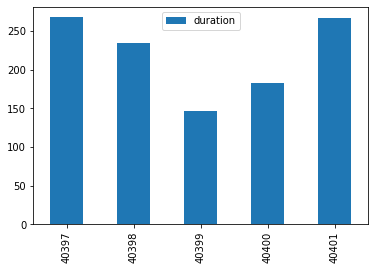

In [44]:
#
df[df['language'] == lang].head().plot(kind='bar')

## 6. Average Duration of song in each laguage

In [45]:
#
for lang in df['language'].unique():
    print(df[df['language'] == lang]['duration'])
    
    break

0       300
1       386
2       221
3       266
4       339
       ... 
3111    604
3112    371
3113    285
3114    376
3115    184
Name: duration, Length: 3116, dtype: int64


In [46]:
#
for lang in df['language'].unique():
    print(lang, int(df[df['language'] == lang]['duration'].mean()))

Urdu 407
Gujarati 271
Tamil 270
Kannada 250
Rajasthani 291
Haryanvi 320
Punjabi 324
Hindi 307
Old 307
Malayalam 242
Marathi 281
Telugu 279
Odia 257
Bhojpuri 357
Assamese 228
Bengali 255


## 7. Number of singers in the dataset

In [85]:
# Singer Column
df['singer']

0             Chitra Singh|Jagjit Singh
1             Chitra Singh|Jagjit Singh
2                          Jagjit Singh
3                          Chitra Singh
4                          Jagjit Singh
                      ...              
41350                     Kishore Kumar
41351                      Feroza Begum
41352    Sandhya Mukherjee|Hemant Kumar
41353                  Ajoy Chakrabarty
41354                       Asha Bhosle
Name: singer, Length: 41355, dtype: object

In [48]:
#
df['singer'].describe()

count               41355
unique               6196
top       Lata Mangeshkar
freq                 1410
Name: singer, dtype: object

In [49]:
#
df['singer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41355 entries, 0 to 41354
Series name: singer
Non-Null Count  Dtype 
--------------  ----- 
41355 non-null  object
dtypes: object(1)
memory usage: 323.2+ KB


In [50]:
#
for singers in df['singer'][:10]:
    print(singers)

Chitra Singh|Jagjit Singh
Chitra Singh|Jagjit Singh
Jagjit Singh
Chitra Singh
Jagjit Singh
Chitra Singh|Jagjit Singh
Chitra Singh|Jagjit Singh
Jagjit Singh
Jagjit Kaur
Chitra Singh|Naseeruddin Shah


Here we can see, we can separate multiple singers of one song by using the split() function.

In [51]:
# Using split()
for singers in df['singer'][:10]:
    print(singers.split('|'))

['Chitra Singh', 'Jagjit Singh']
['Chitra Singh', 'Jagjit Singh']
['Jagjit Singh']
['Chitra Singh']
['Jagjit Singh']
['Chitra Singh', 'Jagjit Singh']
['Chitra Singh', 'Jagjit Singh']
['Jagjit Singh']
['Jagjit Kaur']
['Chitra Singh', 'Naseeruddin Shah']


In [52]:
# Using split()
all_singers = []
for singers in df['singer']:
    all_singers += singers.split('|')

In [53]:
# Result
print(all_singers)

['Chitra Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Kaur', 'Chitra Singh', 'Naseeruddin Shah', 'Jagjit Singh', 'Jagjit Singh', 'Naseeruddin Shah', 'Jagjit Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Naseeruddin Shah', 'Chitra Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Naseeruddin Shah', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Asha Bhosle', 'Ghulam Ali', 'Chitra Singh', 'Gulzar', 'Naseeruddin Shah', 'Vinod Sehgal', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Jagjit Singh', 'Chitra Singh', 'Jagjit Singh', 'Mohammed Rafi', 'Suman Kalyanpur', 'Jagjit Singh', 'Chitra Singh', 'Chitra Singh', 'Jagjit Singh', 'Jagjit Singh', 'Jagjit Singh', 'Begum Akhtar', 'Bhupinde

In [54]:
#
print(len(all_singers))

60166


But there are many singers who sing multiple songs in the given dataset

In [55]:
# Unique Singers
print(set(all_singers))

{'INAYAT ALI', 'Ravindra', 'Seema Trivedi', 'Vijayanti Limaye', 'Davinder Kaur', 'BANALAXMI KANUNGO', 'Archana Saxena', 'nchinger', 'Om Puri', 'Karukurichi P. Arunachalam Nadaswaram', 'Smt. Davender Singh', 'Anna', 'Feroz Khan', 'Sabitha Chaudhary', 'K. Sulochana', 'Apurba Das', 'Hemant Chauhan', 'Jamal Ghani', 'Sowcar Janaki', 'Baban Manjrekar', 'Chandrani Mukherjee', 'Varsha Bhosle', 'Simha', 'M.P.N. Sethuraman', 'Viraj Upadhyaya', 'Arvind Pilgaonkar', 'Suja Radhakrishnan', 'T.S. Bhagavathi', 'Geeta Patnaik', 'Manjiri Kamat', 'Ladha Surinder Kaur', 'Nithin Rajaram Shasthry', 'Jasbir Khushdil', 'PADMINI KOHLAPURE', 'Kailash Kher', 'Glory', 'Akhyay Mohanty', 'Muniba Shaikh', 'Urmila Srivastav', 'Barkat Sidhu', 'Narayan Swami', 'Rani Verma', 'Shrikant Pargaonkar', 'Jagmal Barot', 'Khursheed Ahmed', 'Leena Pradeep', 'Pooja Taayur', 'Bipin Panchal', 'Dilip Prabhakar', 'B.S. Balakrishna', 'SURINDER CHINDA SAVITA', 'Rajasulochana', 'Master Manjunath', 'Jagjit Jeeto', 'Bheemrao Panchale', 'P

In [56]:
# Number of unique singers
print(len(set(all_singers)))

3940


There total 3940 unique singers in the dataset.

## 8. Singer with maximum number of songs

In [57]:
# Unique singers
uniq_singers = list(set(all_singers))

for i in uniq_singers:
    print(i)

INAYAT ALI
Ravindra
Seema Trivedi
Vijayanti Limaye
Davinder Kaur
BANALAXMI KANUNGO
Archana Saxena
nchinger
Om Puri
Karukurichi P. Arunachalam Nadaswaram
Smt. Davender Singh
Anna
Feroz Khan
Sabitha Chaudhary
K. Sulochana
Apurba Das
Hemant Chauhan
Jamal Ghani
Sowcar Janaki
Baban Manjrekar
Chandrani Mukherjee
Varsha Bhosle
Simha
M.P.N. Sethuraman
Viraj Upadhyaya
Arvind Pilgaonkar
Suja Radhakrishnan
T.S. Bhagavathi
Geeta Patnaik
Manjiri Kamat
Ladha Surinder Kaur
Nithin Rajaram Shasthry
Jasbir Khushdil
PADMINI KOHLAPURE
Kailash Kher
Glory
Akhyay Mohanty
Muniba Shaikh
Urmila Srivastav
Barkat Sidhu
Narayan Swami
Rani Verma
Shrikant Pargaonkar
Jagmal Barot
Khursheed Ahmed
Leena Pradeep
Pooja Taayur
Bipin Panchal
Dilip Prabhakar
B.S. Balakrishna
SURINDER CHINDA SAVITA
Rajasulochana
Master Manjunath
Jagjit Jeeto
Bheemrao Panchale
Pal Singh Pal
Forum Desai
Safdar Hussain Khan
Bhagwan Ligade
Ustad Nazakat Ali Khan
Jaymala Shiledar
Master Chandar
Govinda
Pandurang Dixit
Padmanabam
Sudhakar Kanade
M

 #### Lets do it for single singer then we can easily modify it for all singers.

In [58]:
# For 'Jagjit Singh'
count = 0

for i in df['singer']:
    if('Jagjit Singh' == i):
        count += 1

print(count)        

172


But there is also possibility that one singer can sing the song with other singer also, so we have to take care of it.

In [59]:
# For 'Jagjit Singh'
count = 0

for i in df['singer']:
    if('Jagjit Singh' in i):    # Here we use 'in' instead of '==' operator
        count += 1

print(count) 

255


Now, we can see the different between both the reult with different operator.

#### Lets do it for multiple singers

In [60]:
# for 10 singers
uniq_singers = list(set(all_singers))    # Unique singers

for i in uniq_singers[:10]:
    count = 0

    for singers in df['singer']:
        if(i in singers):    # Here we use 'in' instead of '==' operator
            count += 1

    print(i, count)    # print singer with there number of songs

INAYAT ALI 1
Ravindra 127
Seema Trivedi 7
Vijayanti Limaye 1
Davinder Kaur 7
BANALAXMI KANUNGO 3
Archana Saxena 1
nchinger 1
Om Puri 2
Karukurichi P. Arunachalam Nadaswaram 2


#### Method 1

In [61]:
#

singer = []
freq = []    # Frequency of songs played by each singer

uniq_singers = list(set(all_singers))    # Unique singers

for i in uniq_singers:
    count = 0

    for singers in df['singer']:
        if(i in singers):    # Here we use 'in' instead of '==' operator
            count += 1
            
    singer.append(i)
    freq.append(count)

In [62]:
print(singer)

['INAYAT ALI', 'Ravindra', 'Seema Trivedi', 'Vijayanti Limaye', 'Davinder Kaur', 'BANALAXMI KANUNGO', 'Archana Saxena', 'nchinger', 'Om Puri', 'Karukurichi P. Arunachalam Nadaswaram', 'Smt. Davender Singh', 'Anna', 'Feroz Khan', 'Sabitha Chaudhary', 'K. Sulochana', 'Apurba Das', 'Hemant Chauhan', 'Jamal Ghani', 'Sowcar Janaki', 'Baban Manjrekar', 'Chandrani Mukherjee', 'Varsha Bhosle', 'Simha', 'M.P.N. Sethuraman', 'Viraj Upadhyaya', 'Arvind Pilgaonkar', 'Suja Radhakrishnan', 'T.S. Bhagavathi', 'Geeta Patnaik', 'Manjiri Kamat', 'Ladha Surinder Kaur', 'Nithin Rajaram Shasthry', 'Jasbir Khushdil', 'PADMINI KOHLAPURE', 'Kailash Kher', 'Glory', 'Akhyay Mohanty', 'Muniba Shaikh', 'Urmila Srivastav', 'Barkat Sidhu', 'Narayan Swami', 'Rani Verma', 'Shrikant Pargaonkar', 'Jagmal Barot', 'Khursheed Ahmed', 'Leena Pradeep', 'Pooja Taayur', 'Bipin Panchal', 'Dilip Prabhakar', 'B.S. Balakrishna', 'SURINDER CHINDA SAVITA', 'Rajasulochana', 'Master Manjunath', 'Jagjit Jeeto', 'Bheemrao Panchale', 'P

In [63]:
print(freq)

[1, 127, 7, 1, 7, 3, 1, 1, 2, 2, 1, 3, 4, 1, 3, 1, 102, 11, 1, 1, 68, 9, 1, 3, 1, 5, 1, 1, 11, 2, 19, 1, 14, 2, 4, 1, 5, 14, 10, 6, 17, 1, 10, 1, 31, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 8, 3, 5, 1, 1, 4, 2, 152, 32, 1, 4, 4, 2, 1, 3, 1, 2, 16, 1, 3, 6, 3, 2, 2, 1, 2, 12, 25, 7, 9, 145, 1, 2, 9, 2, 31, 1, 116, 51, 1, 4, 38, 2, 32, 1, 8, 7, 2, 1, 1, 1, 4, 1, 1, 10, 1, 2, 11, 6, 2, 1, 3, 1, 3, 11, 6, 1, 2, 7, 247, 1, 21, 51, 8, 3, 81, 8, 2, 2, 21, 3, 2, 1, 1, 10, 9, 4, 35, 1, 1, 2, 27, 25, 3, 2, 1, 19, 1154, 2, 2, 17, 19, 8, 13, 1, 2, 1, 2, 2, 10, 1, 4, 1, 3, 16, 3, 3056, 1, 18, 22, 2, 1, 2, 1, 3, 3, 3, 1, 2, 18, 2, 1, 15, 5, 14, 12, 2, 2204, 2, 1, 1, 3, 3270, 1, 1, 38, 3, 6, 1, 6, 8, 4, 7, 2, 14, 2, 1, 2, 4, 1, 1, 7, 10, 8, 2, 1, 9, 1, 8, 1, 13, 1, 2, 2, 4, 6, 1, 1, 2, 2, 1, 1, 1, 239, 8, 2, 1, 14, 19, 1, 9, 1, 39, 4, 2, 2, 8, 8, 2, 1, 10, 1, 4, 2, 707, 4, 1, 8, 2, 4, 1, 1, 1, 3659, 2, 1, 51, 1, 1, 1, 5, 3, 1, 1, 9, 2, 5, 1, 1, 6, 2, 2, 1, 2, 2, 8, 471, 8, 2, 1, 9, 6, 17, 1, 1, 2, 1, 2, 2, 1, 

In [64]:
#
len(singer) == len(freq)

True

We can do the same thing using one 2D list also

#### Method 2

In [65]:
# For first 10 singers
data = []

uniq_singers = list(set(all_singers))    # Unique singers

for i in uniq_singers[:10]:
    count = 0

    for singers in df['singer']:
        if(i in singers):    # Here we use 'in' instead of '==' operator
            count += 1
            
    data.append([i, count])

In [66]:
# Result
for i in data:
    print(i)

['INAYAT ALI', 1]
['Ravindra', 127]
['Seema Trivedi', 7]
['Vijayanti Limaye', 1]
['Davinder Kaur', 7]
['BANALAXMI KANUNGO', 3]
['Archana Saxena', 1]
['nchinger', 1]
['Om Puri', 2]
['Karukurichi P. Arunachalam Nadaswaram', 2]


In [67]:
# 
data = []

uniq_singers = list(set(all_singers))    # Unique singers

for i in tqdm(uniq_singers):
    count = 0

    for singers in df['singer']:
        if(i in singers):    # Here we use 'in' instead of '==' operator
            count += 1
            
    data.append([i, count])

100%|██████████████████████████████████████| 3940/3940 [00:18<00:00, 208.61it/s]


In [68]:
# Result
for i in data:
    print(i)

['INAYAT ALI', 1]
['Ravindra', 127]
['Seema Trivedi', 7]
['Vijayanti Limaye', 1]
['Davinder Kaur', 7]
['BANALAXMI KANUNGO', 3]
['Archana Saxena', 1]
['nchinger', 1]
['Om Puri', 2]
['Karukurichi P. Arunachalam Nadaswaram', 2]
['Smt. Davender Singh', 1]
['Anna', 3]
['Feroz Khan', 4]
['Sabitha Chaudhary', 1]
['K. Sulochana', 3]
['Apurba Das', 1]
['Hemant Chauhan', 102]
['Jamal Ghani', 11]
['Sowcar Janaki', 1]
['Baban Manjrekar', 1]
['Chandrani Mukherjee', 68]
['Varsha Bhosle', 9]
['Simha', 1]
['M.P.N. Sethuraman', 3]
['Viraj Upadhyaya', 1]
['Arvind Pilgaonkar', 5]
['Suja Radhakrishnan', 1]
['T.S. Bhagavathi', 1]
['Geeta Patnaik', 11]
['Manjiri Kamat', 2]
['Ladha Surinder Kaur', 19]
['Nithin Rajaram Shasthry', 1]
['Jasbir Khushdil', 14]
['PADMINI KOHLAPURE', 2]
['Kailash Kher', 4]
['Glory', 1]
['Akhyay Mohanty', 5]
['Muniba Shaikh', 14]
['Urmila Srivastav', 10]
['Barkat Sidhu', 6]
['Narayan Swami', 17]
['Rani Verma', 1]
['Shrikant Pargaonkar', 10]
['Jagmal Barot', 1]
['Khursheed Ahmed', 31

## Create new DataFrame 

We are going to create a new dataframe for all the singers with only 2 columns.
1 ---> Name of the Singer
2 ---> Number of song which are played by that particular singer in dataset

In [69]:
len(data)

3940

In [70]:
len(uniq_singers)

3940

In [71]:
#
len(data) == len(uniq_singers)

True

In [72]:
#
data[0]

['INAYAT ALI', 1]

In [73]:
#
songs = pd.DataFrame(data,columns = ['Singers', 'Number of Songs'])

In [74]:
#
songs

,Singers,Number of Songs
0,INAYAT ALI,1
1,Ravindra,127
2,Seema Trivedi,7
3,Vijayanti Limaye,1
4,Davinder Kaur,7
...,...,...
3935,Master Dinanath Mangeshkar,23
3936,Sarda Sinha,8
3937,Milind Shinde,33
3938,Shashi Prabha,4


In [75]:
# Top 5 records of the dataset
songs.head()

,Singers,Number of Songs
0,INAYAT ALI,1
1,Ravindra,127
2,Seema Trivedi,7
3,Vijayanti Limaye,1
4,Davinder Kaur,7


### 8.1) Singer with maximum number of songs

In [76]:
#
songs.sort_values(by='Number of Songs')

,Singers,Number of Songs
0,INAYAT ALI,1
1435,Nagur,1
1434,Nahid Akhar,1
1432,G.T. Balakrishna,1
3168,Malaysia Vasudevan Kveeramani,1
...,...,...
1908,P. Susheela,3213
1090,Susheela,3215
3010,Susheel,3216
197,Kumar,3270


In [77]:
# Revers order
songs.sort_values(by='Number of Songs', ascending = False)

,Singers,Number of Songs
268,S. P. Balasubrahmanyam,3659
197,Kumar,3270
3010,Susheel,3216
1090,Susheela,3215
1908,P. Susheela,3213
...,...,...
516,Radha Mangeshkar,1
2948,Nandhini,1
2947,Ishrat Jehan,1
1992,Wagya,1


In [78]:
# Revers order
songs.sort_values(by='Number of Songs', ascending = False).head(1)

,Singers,Number of Songs
268,S. P. Balasubrahmanyam,3659


Mr. S. P. Balasubrahmanyam sings maximum number of songs in the given dataset

## 9. Top 5 Singers with maximum number of songs

In [79]:
# Revers order
songs.sort_values(by='Number of Songs', ascending = False).head()

,Singers,Number of Songs
268,S. P. Balasubrahmanyam,3659
197,Kumar,3270
3010,Susheel,3216
1090,Susheela,3215
1908,P. Susheela,3213


<AxesSubplot:>

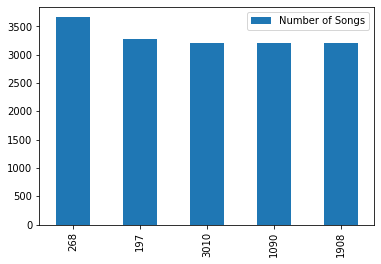

In [80]:
# Bar plot
songs.sort_values(by='Number of Songs', ascending = False).head().plot(kind = 'bar')

## 9. Number of Songs in each language

In [81]:
# Unique Languages
for lang in df['language'].unique():
    print(lang)

Urdu
Gujarati
Tamil
Kannada
Rajasthani
Haryanvi
Punjabi
Hindi
Old
Malayalam
Marathi
Telugu
Odia
Bhojpuri
Assamese
Bengali


In [82]:
# Each language with number of songs
for lang in df['language'].unique():
    
    temp_df = df[df['language'] == lang]    # New dataframe for each uniq language for the original dataframe
    
    print(lang, len(temp_df))

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


## 10. Number of Singer in each Category 

In [83]:
#
for lang in df['language'].unique():
    
    temp_df = df[df['language'] == lang]
    
    all_singers = []
    for singers in temp_df['singer']:
        all_singers += singers.split('|')
    
    print(lang, len(set(all_singers)))

Urdu 385
Gujarati 303
Tamil 510
Kannada 379
Rajasthani 218
Haryanvi 76
Punjabi 636
Hindi 515
Old 515
Malayalam 72
Marathi 569
Telugu 369
Odia 243
Bhojpuri 109
Assamese 228
Bengali 192


## 11. Language with number of songs and  unique singer

In [84]:
#

for lang in df['language'].unique():
    
    temp_df = df[df['language'] == lang]
    
    all_singers = []
    for singers in temp_df['singer']:
        all_singers += singers.split('|')
    
    print(lang, len(temp_df), len(set(all_singers)))

Urdu 3116 385
Gujarati 2115 303
Tamil 4677 510
Kannada 3559 379
Rajasthani 541 218
Haryanvi 228 76
Punjabi 3818 636
Hindi 4993 515
Old 4993 515
Malayalam 479 72
Marathi 4699 569
Telugu 4996 369
Odia 940 243
Bhojpuri 519 109
Assamese 724 228
Bengali 958 192
